In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Step 1 : Data Understanding, Preparation, and Pre-Processing :

In [2]:
# loading the dataset
df_churn = pd.read_csv("train.csv")

In [3]:
#reading the dataset
df_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
#checking shape of dataset
df_churn.shape

(69999, 172)

In [5]:
#checking info of dataset
df_churn.info("show_counts=True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

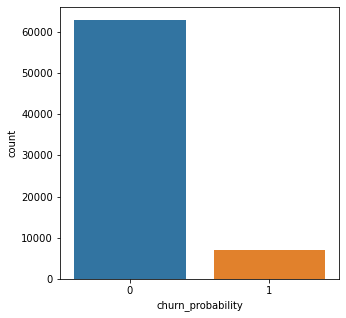

In [6]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_churn['churn_probability'])
plt.show()

In [7]:
print('churn_probability : {0}%'.format(round(((sum(df_churn['churn_probability'])/len(df_churn['churn_probability']))*100),2)))

churn_probability : 10.19%


<AxesSubplot:xlabel='aon_group'>

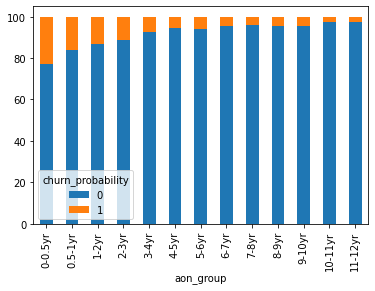

In [8]:
df_churn["aon_group"] = pd.cut(df_churn["aon"],[0,180,365,730,1095,1460,1825,2190,2555,2920,3285,3650,4015,4380], precision=0, 
    labels=['0-0.5yr','0.5-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr','6-7yr','7-8yr','8-9yr','9-10yr','10-11yr','11-12yr'])

(df_churn.groupby('aon_group')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [9]:
col_with_equal_values = []
for col in df_churn.columns:
    if (df_churn[col] == df_churn[col][0]).all():
        print("All values are equal in column", col)
        col_with_equal_values.append(col)

All values are equal in column circle_id
All values are equal in column last_date_of_month_6


In [10]:
#All values are same so dropping this value.
df_churn.drop('circle_id', axis=1, inplace=True)

In [11]:
df_churn['last_date_of_month_6'].value_counts()

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64

In [12]:
#All values are same so setting to the day of the month.
df_churn['last_date_of_month_6'] = df_churn['last_date_of_month_6'].replace('6/30/2014','30')
df_churn['last_date_of_month_6'].value_counts()

30    69999
Name: last_date_of_month_6, dtype: int64

In [13]:
df_churn['last_date_of_month_7'].value_counts()

7/31/2014    69600
Name: last_date_of_month_7, dtype: int64

In [14]:
df_churn['last_date_of_month_7'] = df_churn['last_date_of_month_7'].replace('7/31/2014','31')
df_churn['last_date_of_month_7'].value_counts()

31    69600
Name: last_date_of_month_7, dtype: int64

In [15]:
df_churn['last_date_of_month_8'].value_counts()

8/31/2014    69266
Name: last_date_of_month_8, dtype: int64

In [16]:
df_churn['last_date_of_month_8'] = df_churn['last_date_of_month_8'].replace('8/31/2014','31')
df_churn['last_date_of_month_8'].value_counts()

31    69266
Name: last_date_of_month_8, dtype: int64

In [17]:
categorical_columns = df_churn.select_dtypes(include=['object'])
categorical_columns

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,30,31,31,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,30,31,31,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,30,31,31,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,30,31,31,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,30,31,31,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,30,31,31,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,30,31,31,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,30,31,31,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,30,31,31,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [18]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns_categorcal = categorical_columns.isnull().sum()/len(categorical_columns)*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
date_of_last_rech_8          3.515765
date_of_last_rech_7          1.762882
date_of_last_rech_6          1.572880
last_date_of_month_8         1.047158
last_date_of_month_7         0.570008
dtype: float64

In [19]:
df_churn['last_date_of_month_7'] = df_churn['last_date_of_month_7'].fillna(0)
df_churn['last_date_of_month_8'] = df_churn['last_date_of_month_8'].fillna(0)

In [20]:
df_churn['date_of_last_rech_6'] = pd.DatetimeIndex(df_churn['date_of_last_rech_6']).day
df_churn['date_of_last_rech_6'] = df_churn['date_of_last_rech_6'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_6": object})

In [21]:
df_churn['date_of_last_rech_7'] = pd.DatetimeIndex(df_churn['date_of_last_rech_7']).day
df_churn['date_of_last_rech_7'] = df_churn['date_of_last_rech_7'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_7": object})

In [22]:
df_churn['date_of_last_rech_8'] = pd.DatetimeIndex(df_churn['date_of_last_rech_8']).day
df_churn['date_of_last_rech_8'] = df_churn['date_of_last_rech_8'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_8": object})

In [23]:
df_churn['date_of_last_rech_data_6'] = pd.DatetimeIndex(df_churn['date_of_last_rech_data_6']).day
df_churn['date_of_last_rech_data_6'] = df_churn['date_of_last_rech_data_6'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_data_6": object})

In [24]:
df_churn['date_of_last_rech_data_7'] = pd.DatetimeIndex(df_churn['date_of_last_rech_data_7']).day
df_churn['date_of_last_rech_data_7'] = df_churn['date_of_last_rech_data_7'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_data_7": object})

In [25]:
df_churn['date_of_last_rech_data_8'] = pd.DatetimeIndex(df_churn['date_of_last_rech_data_8']).day
df_churn['date_of_last_rech_data_8'] = df_churn['date_of_last_rech_data_8'].fillna(0)
df_churn = df_churn.astype({"date_of_last_rech_data_8": object})

In [26]:
categorical_columns = df_churn.select_dtypes(include=['object'])
categorical_columns

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,30,31,31,22.0,10.0,24.0,0.0,0.0,0.0
1,30,31,31,12.0,10.0,26.0,0.0,8.0,0.0
2,30,31,31,11.0,22.0,24.0,0.0,0.0,0.0
3,30,31,31,15.0,21.0,25.0,0.0,0.0,0.0
4,30,31,31,25.0,26.0,30.0,25.0,23.0,20.0
...,...,...,...,...,...,...,...,...,...
69994,30,31,31,18.0,31.0,31.0,0.0,31.0,21.0
69995,30,31,31,28.0,31.0,27.0,0.0,0.0,0.0
69996,30,31,31,25.0,30.0,29.0,0.0,0.0,0.0
69997,30,31,31,29.0,19.0,26.0,17.0,13.0,14.0


In [27]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns_categorcal = categorical_columns.isnull().sum()/len(categorical_columns)*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

Series([], dtype: float64)

In [28]:
numerical_columns = df_churn.select_dtypes(include=['int64','float'])
numerical_columns

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0

In [29]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

night_pck_user_6     74.902499
arpu_2g_6            74.902499
total_rech_data_6    74.902499
fb_user_6            74.902499
arpu_3g_6            74.902499
                       ...    
std_ic_t2o_mou_7      3.838626
std_ic_mou_7          3.838626
std_og_t2o_mou        1.002871
loc_ic_t2o_mou        1.002871
loc_og_t2o_mou        1.002871
Length: 117, dtype: float64

In [30]:
df_churn[numerical_columns.columns] = df_churn[numerical_columns.columns].fillna(0)

In [31]:
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns_60percent = null_percentage_Of_Columns[null_percentage_Of_Columns>60]
null_percentage_Of_Columns_60percent

Series([], dtype: float64)

In [32]:
for col in null_percentage_Of_Columns_60percent.index:
    df_churn.drop(col, axis=1, inplace=True)
    

In [33]:
#checking shape of dataset
df_churn.shape

(69999, 172)

In [34]:
df_churn = df_churn.dropna()

In [35]:
#checking shape of dataset
df_churn.shape

(69999, 172)

In [36]:
col_with_equal_values = []
for col in df_churn.columns:
    if (df_churn[col] == df_churn[col][0]).all():
        print("All values are equal in column", col)
        col_with_equal_values.append(col)

All values are equal in column loc_og_t2o_mou
All values are equal in column std_og_t2o_mou
All values are equal in column loc_ic_t2o_mou
All values are equal in column last_date_of_month_6
All values are equal in column std_og_t2c_mou_6
All values are equal in column std_og_t2c_mou_7
All values are equal in column std_og_t2c_mou_8
All values are equal in column std_ic_t2o_mou_6
All values are equal in column std_ic_t2o_mou_7
All values are equal in column std_ic_t2o_mou_8


In [37]:
col_with_equal_values

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [38]:
#for col in col_with_equal_values:
df_churn['loc_og_t2o_mou'].value_counts()

0.0    69999
Name: loc_og_t2o_mou, dtype: int64

In [39]:
df_churn['std_og_t2o_mou'].value_counts()

0.0    69999
Name: std_og_t2o_mou, dtype: int64

In [40]:
df_churn['loc_ic_t2o_mou'].value_counts()

0.0    69999
Name: loc_ic_t2o_mou, dtype: int64

In [41]:
df_churn['last_date_of_month_6'].value_counts()

30    69999
Name: last_date_of_month_6, dtype: int64

In [42]:
df_churn['std_og_t2c_mou_6'].value_counts()

0.0    69999
Name: std_og_t2c_mou_6, dtype: int64

In [43]:
df_churn['std_og_t2c_mou_7'].value_counts()

0.0    69999
Name: std_og_t2c_mou_7, dtype: int64

In [44]:
df_churn['std_og_t2c_mou_8'].value_counts()

0.0    69999
Name: std_og_t2c_mou_8, dtype: int64

In [45]:
df_churn['std_ic_t2o_mou_6'].value_counts()

0.0    69999
Name: std_ic_t2o_mou_6, dtype: int64

In [46]:
df_churn['std_ic_t2o_mou_7'].value_counts()

0.0    69999
Name: std_ic_t2o_mou_7, dtype: int64

In [47]:
df_churn['std_ic_t2o_mou_8'].value_counts()

0.0    69999
Name: std_ic_t2o_mou_8, dtype: int64

In [48]:
for col in col_with_equal_values:
    if col != 'last_date_of_month_6':
        df_churn.drop(col, axis=1, inplace=True)

In [49]:
#checking shape of dataset
df_churn.shape

(69999, 163)

In [50]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [51]:
df_churn.head(20)

,id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_group
0,0,30,31,31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.00,65.09,204.99,1.01,0.00,0.00,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.0,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,22.0,10.0,24.0,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0,5-6yr
1,1,30,31,31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,12.0,10.0,26.0,0,0,0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.0,0.00,122.07,0.0,0.00,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.00,0.00,0.00,0,1-2yr
2,2,30,31,31,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.0

In [52]:
df_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69

In [53]:
numerical_columns = df_churn.select_dtypes(include=['int64','float'])
numerical_columns.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'], dtype='object', length=153)

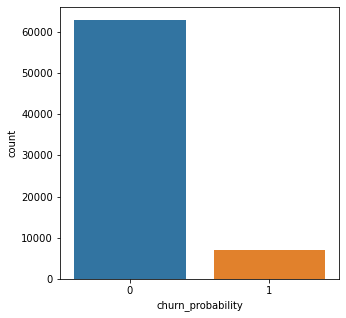

In [54]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_churn['churn_probability'])
plt.show()

In [55]:
print('churn_probability : {0}%'.format(round(((sum(df_churn['churn_probability'])/len(df_churn['churn_probability']))*100),2)))

churn_probability : 10.19%


In [56]:
df_churn["aon_group"] = pd.cut(df_churn["aon"],[0,180,365,730,1095,1460,1825,2190,2555,2920,3285,3650,4015,4380], precision=0, 
    labels=['0-0.5yr','0.5-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr','6-7yr','7-8yr','8-9yr','9-10yr','10-11yr','11-12yr'])

<AxesSubplot:xlabel='aon_group'>

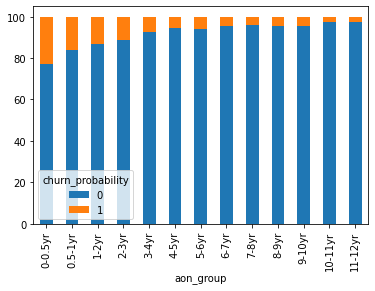

In [57]:
(df_churn.groupby('aon_group')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [58]:
df_churn.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,0.000225,0.003596,0.003855,0.002666,0.006046,0.002643,-0.007596,-0.005083,-0.003990,-0.000091,-0.001986,0.006538,-0.005495,-0.006431,-0.000177,-0.000182,0.004339,0.002469,0.002522,0.003826,0.003857,0.005159,0.001073,0.001059,-0.001637,0.000042,-0.002743,0.001784,0.005163,0.004000,0.003649,0.004627,0.001536,-0.009981,-0.007492,-0.006964,0.003290,0.006350,0.003884,-0.004064,-0.001752,-0.003502,-0.001963,-0.000847,-0.000327,-0.002061,0.002365,-0.001753,-0.003585,-0.004365,0.001259,-0.002642,0.001188,-0.001004,0.004344,0.005114,0.004712,0.002171,0.002921,0.002215,0.000802,0.001632,0.004862,0.003973,0.005123,0.004869,0.001692,0.005859,0.006334,0.001419,0.000425,0.000564,0.005702,0.010052,0.003242,0.002828,0.004625,0.004060,0.006369,0.006972,0.007130,0.004374,0.005307,-0.001622,0.007916,0.003419,0.006188,0.007754,0.003579,0.004496,-0.000283,0.003220,-0.000109,-0.000351,0.003147,0.002825,0.003258,0.005765,0.008881,-0.000441,0.003306,0.004289,-0.001376,0.001462,0.002412,0.003479,0.003311,0.005258,-0.003619,0.000863,0.001954,0.004440,0.001841,0.001905,0.001719,0.003070,0.006255,0.004449,-0.003420,0.003472,0.003949,0.004254,0.005560,0.004934,0.002874,0.003400,0.004932,0.003468,0.004281,0.001584,0.002721,0.004012,-0.001613,0.002349,0.002538,-0.003361,0.000442,0.001519,0.006646,0.003371,0.004540,0.001200,0.000165,-0.000313,0.006292,0.003142,0.006872,-0.000702,0.006768,0.004040,0.003071,-0.001669
arpu_6,0.000225,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,0.455762,0.358563,0.132511,0.089524,0.086243,0.235952,0.172643,0.140823,0.237552,0.199410,0.181197,0.435082,0.360952,0.311930,0.190971,0.162799,0.149672,0.070772,0.027451,0.017975,0.431472,0.359189,0.315364,0.363922,0.249171,0.187141,0.386478,0.265942,0.184352,0.088255,0.066865,0.057118,0.490014,0.33704

In [59]:
for col in numerical_columns.columns:
    q1 = df_churn[col].quantile(0.10)
    q3 = df_churn[col].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_churn = df_churn.loc[(df_churn[col] > fence_low) & (df_churn[col] < fence_high)]

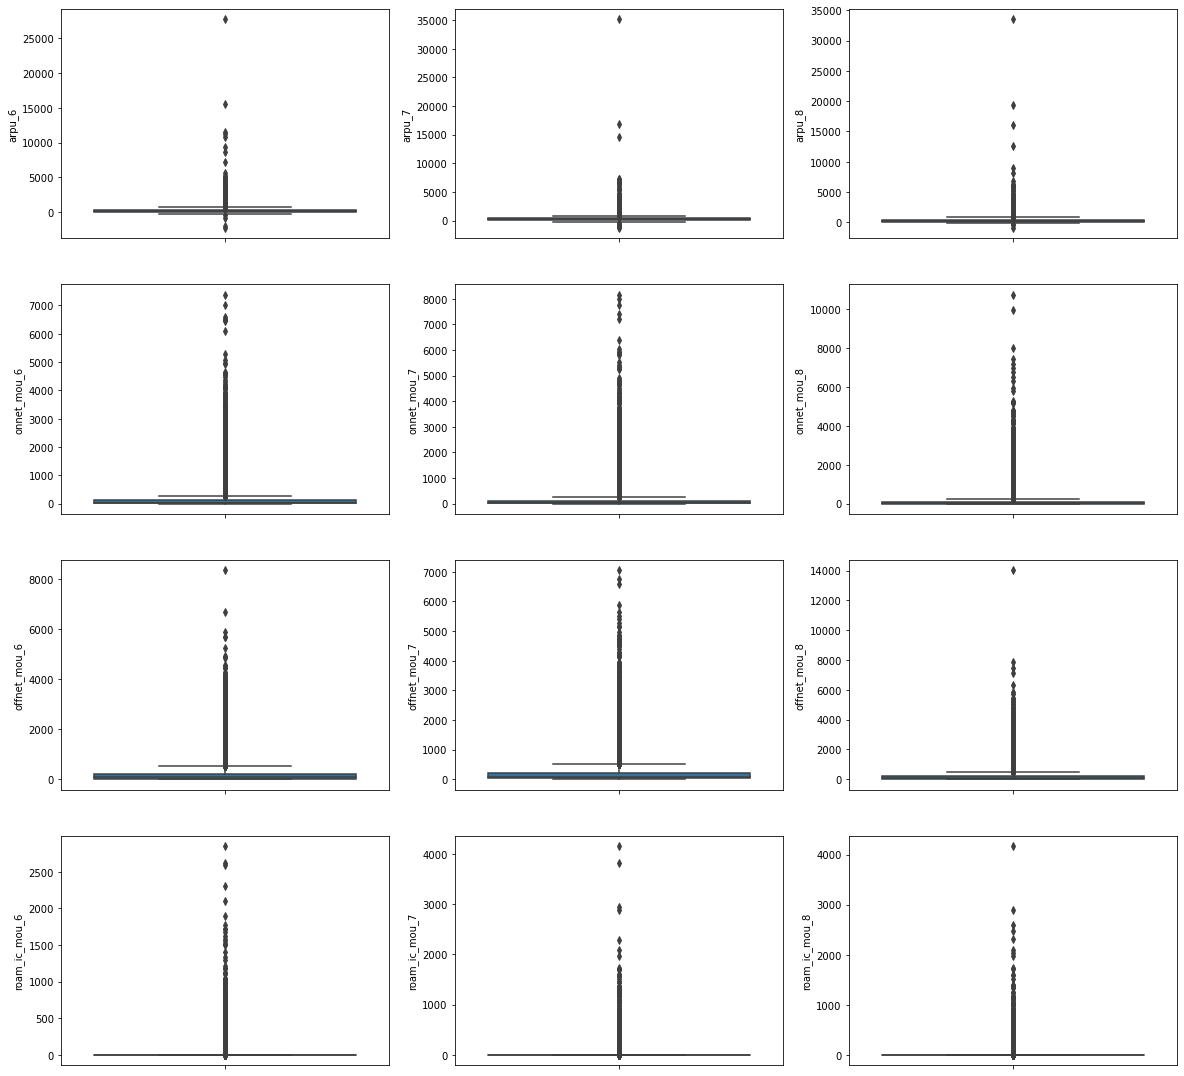

In [60]:
#Checking Outliesrs
plt.figure(figsize=(20, 60))
i=1
while i <=12:
    plt.subplot(12,3,i)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

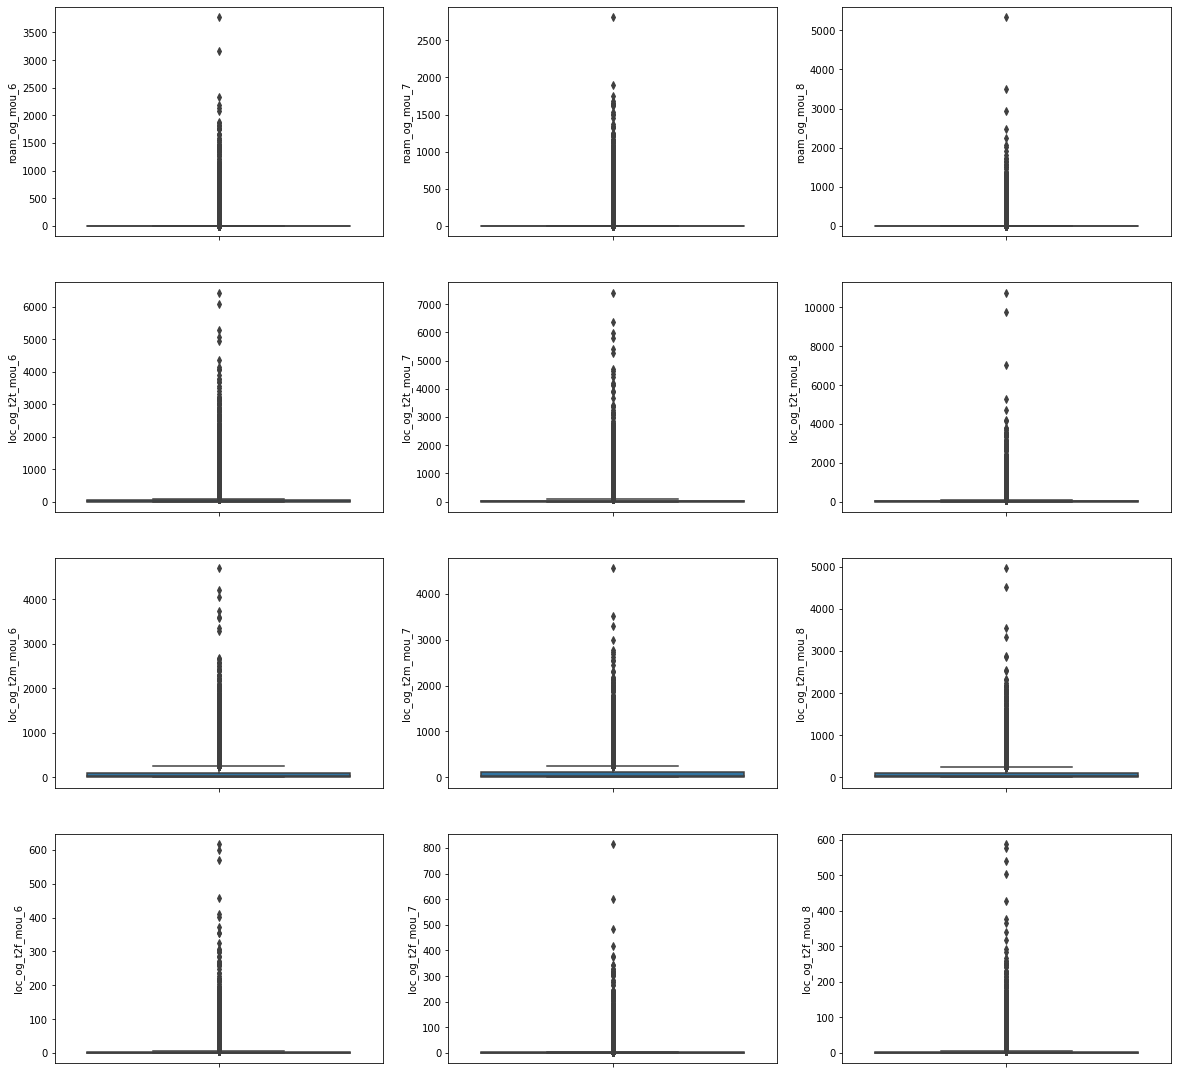

In [61]:
plt.figure(figsize=(20, 60))
i=13
while i <=24:
    plt.subplot(12,3,i-12)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

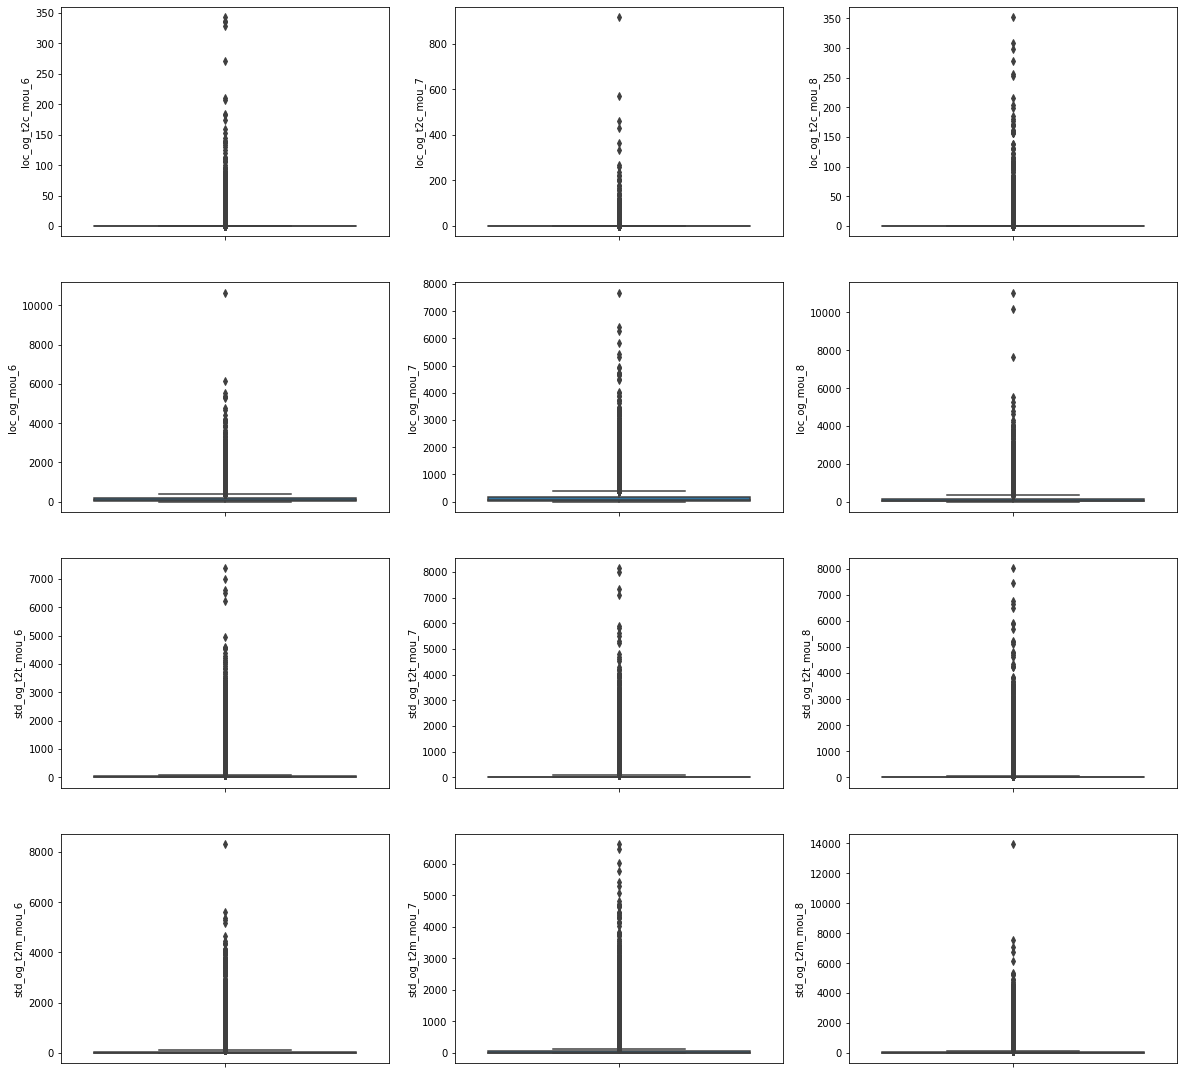

In [62]:
plt.figure(figsize=(20, 60))
i=25
while i <=36:
    plt.subplot(12,3,i-24)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

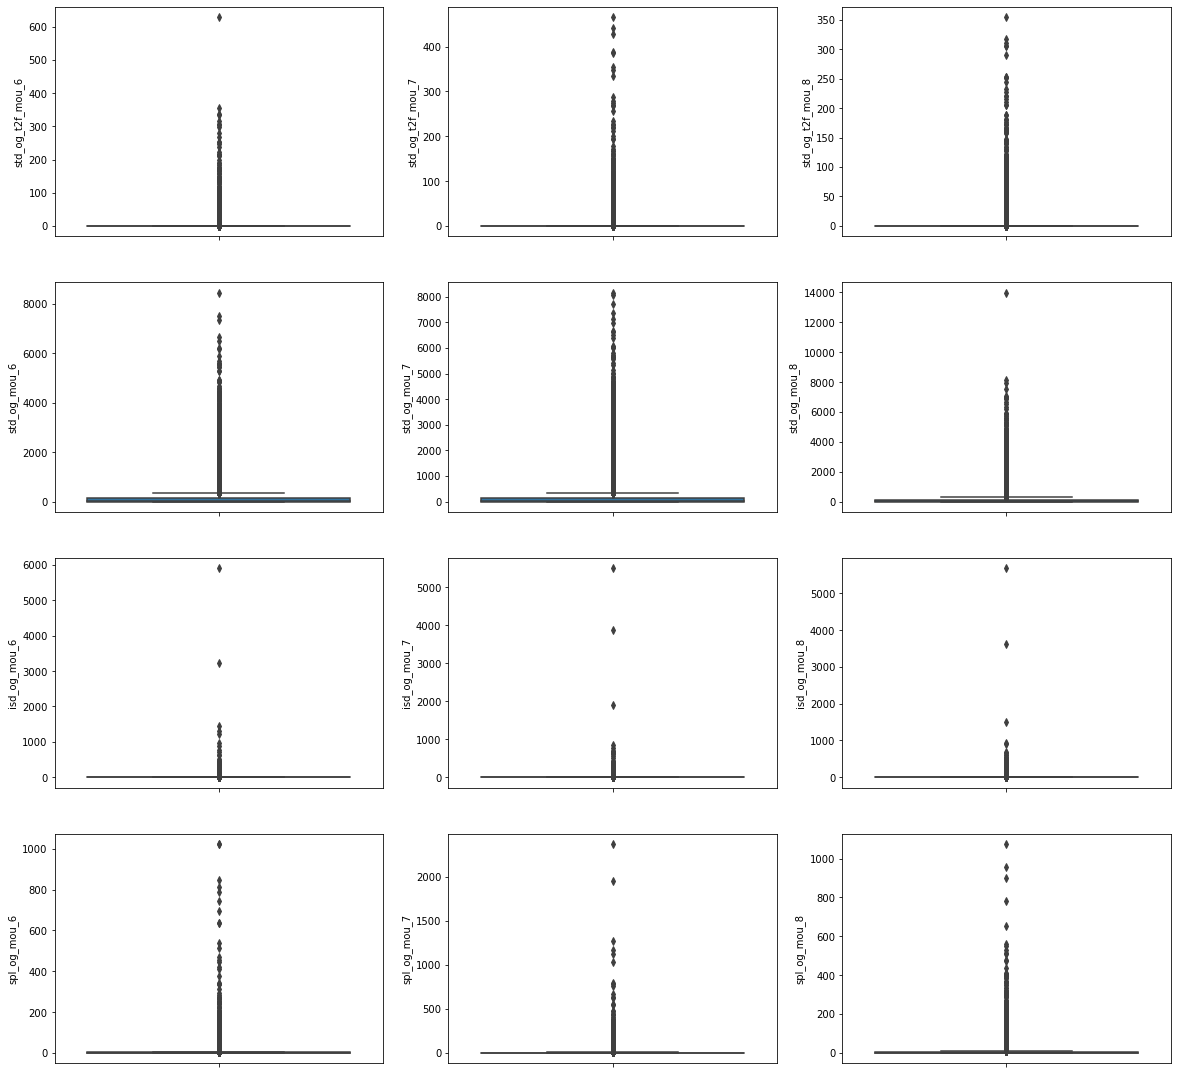

In [63]:
plt.figure(figsize=(20, 60))
i=37
while i <=48:
    plt.subplot(12,3,i-36)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

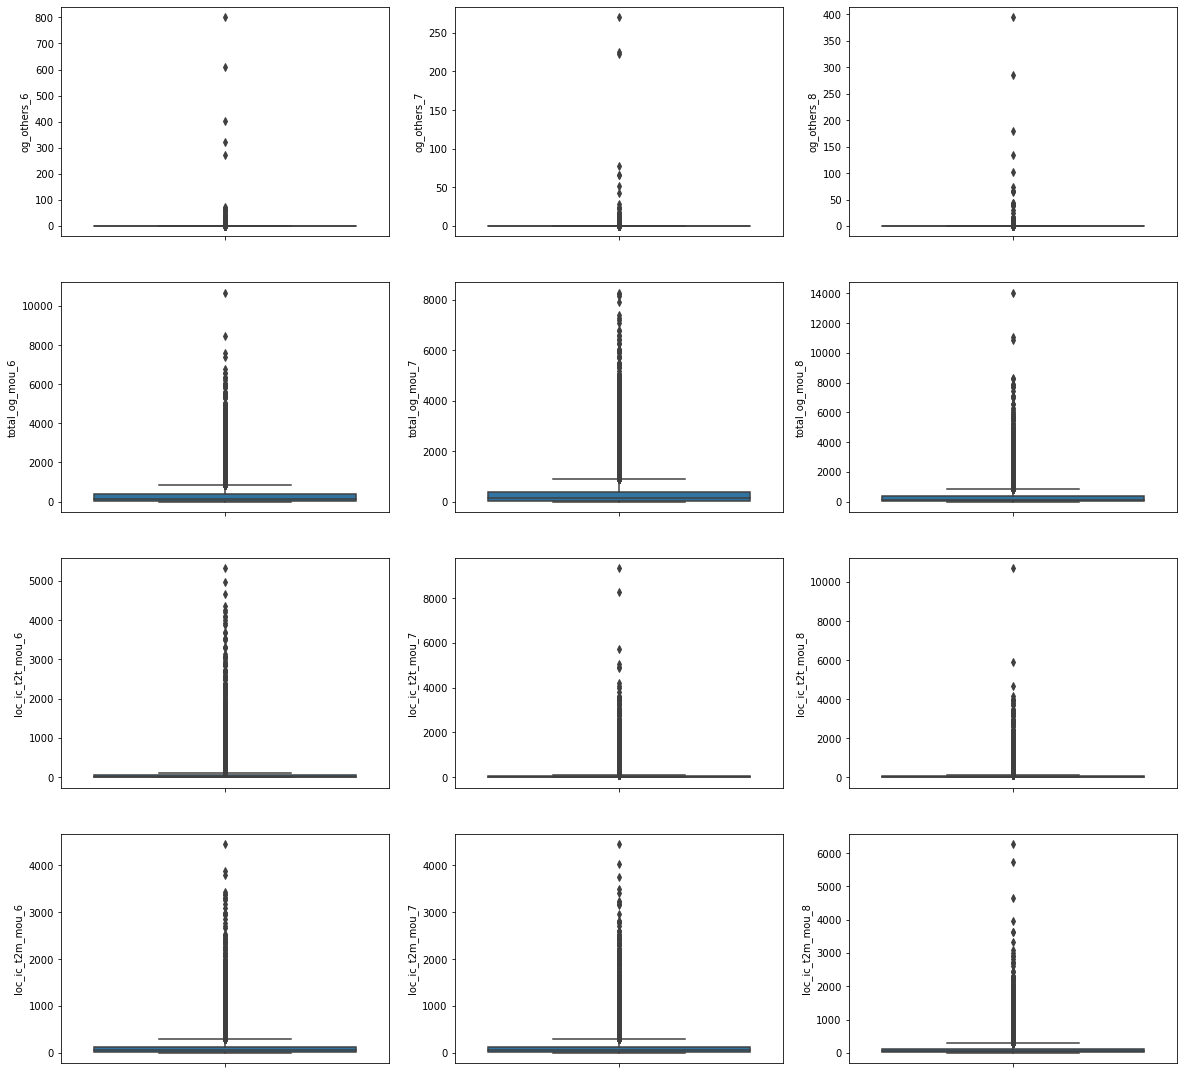

In [64]:
plt.figure(figsize=(20, 60))
i=49
while i <=60:
    plt.subplot(12,3,i-48)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

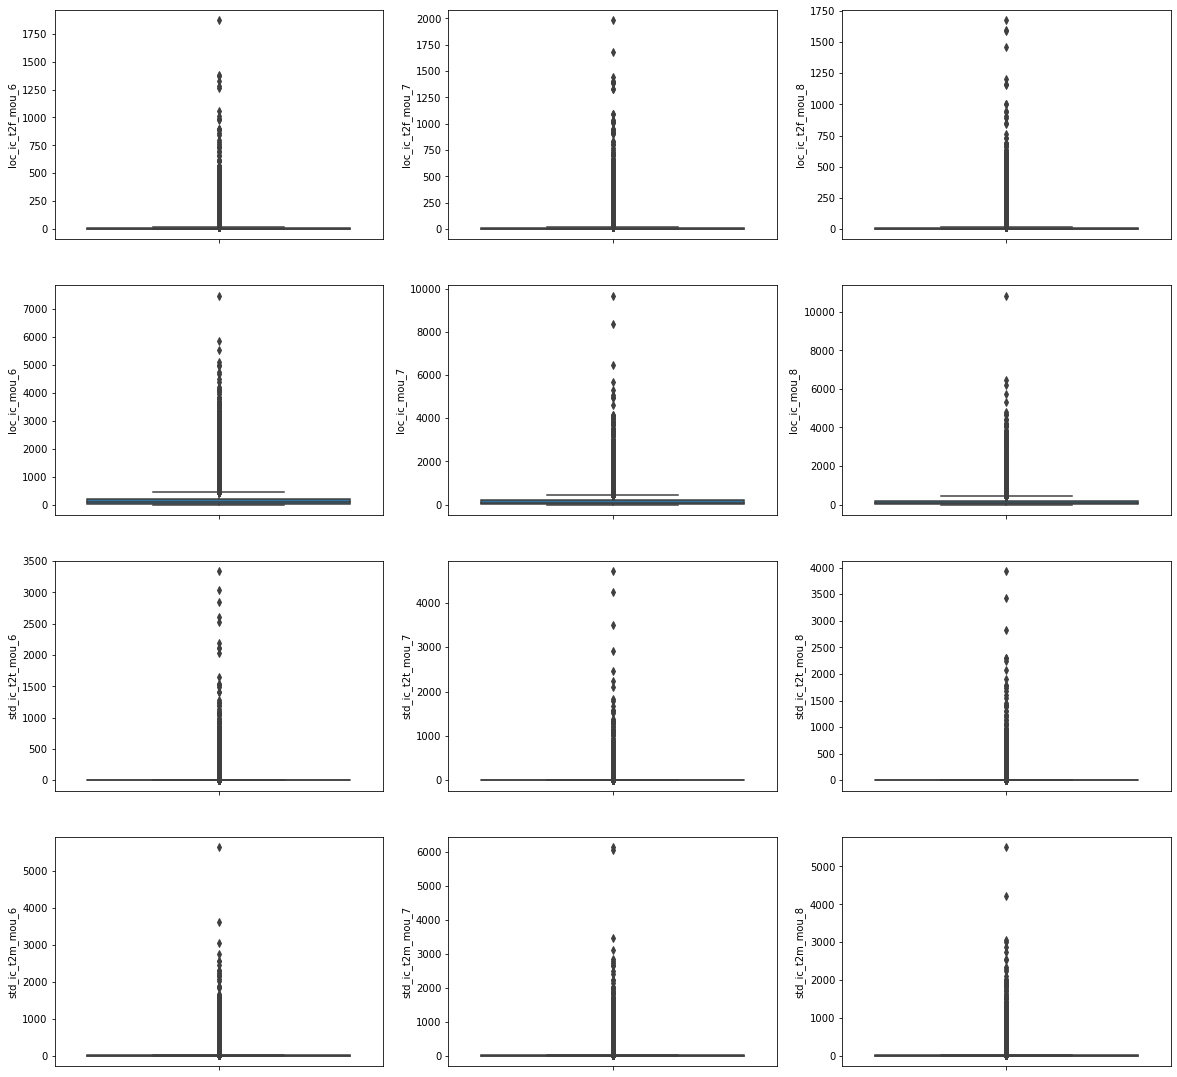

In [65]:
plt.figure(figsize=(20, 60))
i=61
while i <=72:
    plt.subplot(12,3,i-60)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

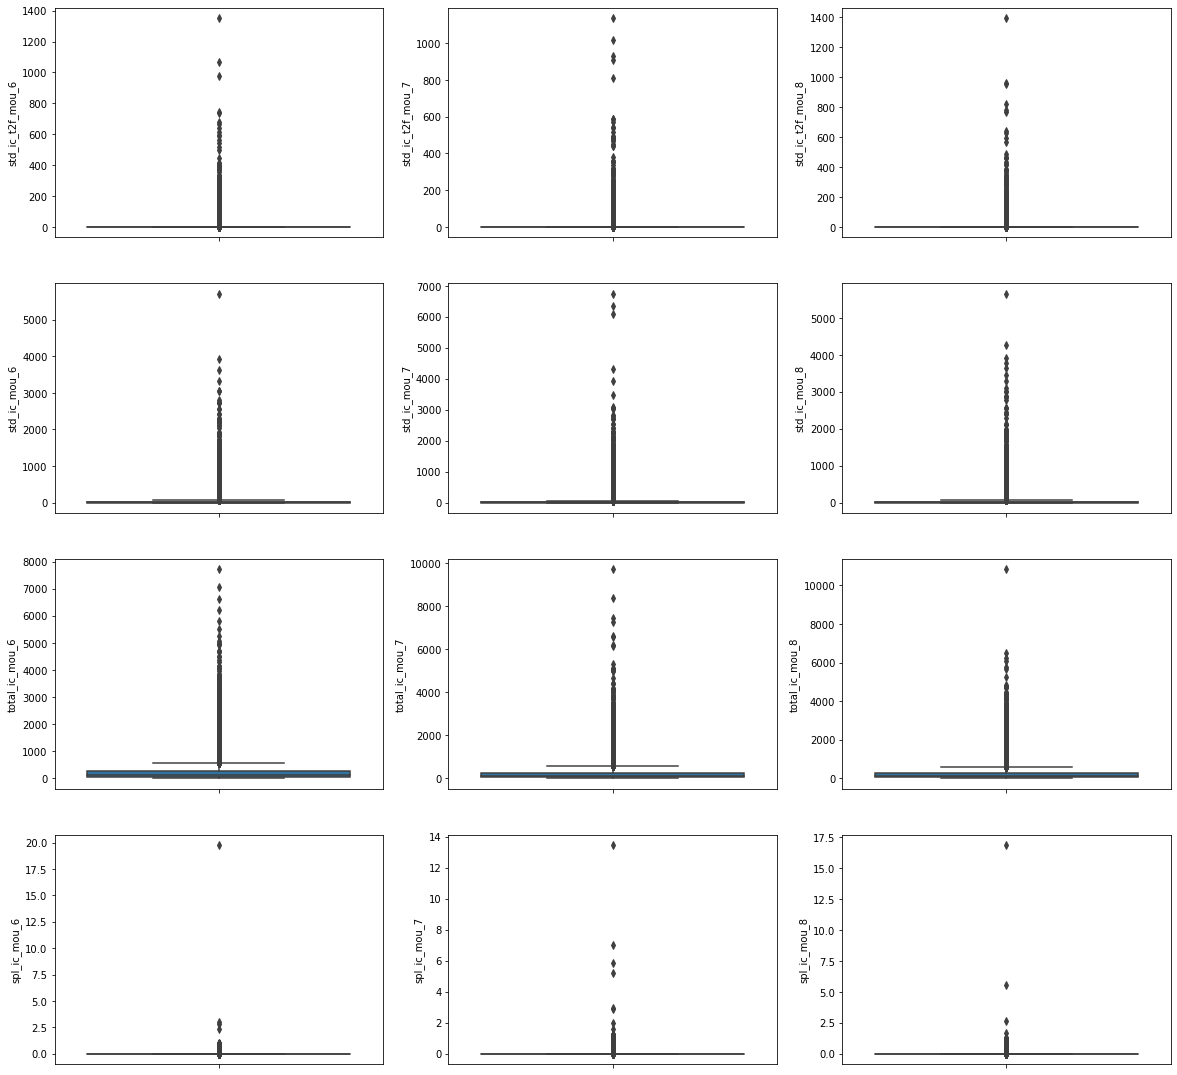

In [66]:
plt.figure(figsize=(20, 60))
i=73
while i <=84:
    plt.subplot(12,3,i-72)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

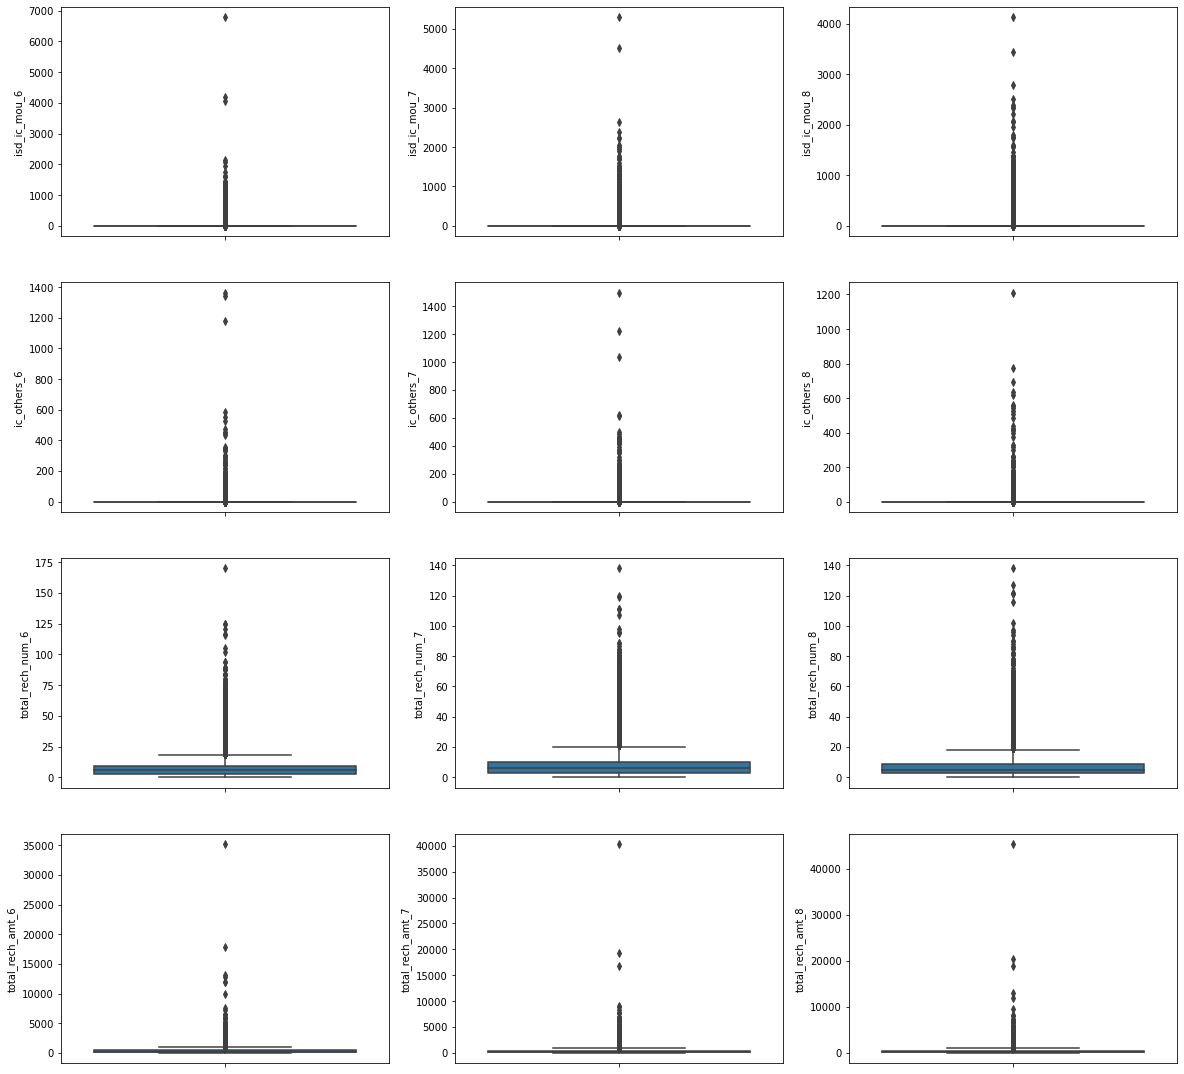

In [67]:
plt.figure(figsize=(20, 60))
i=85
while i <=96:
    plt.subplot(12,3,i-84)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

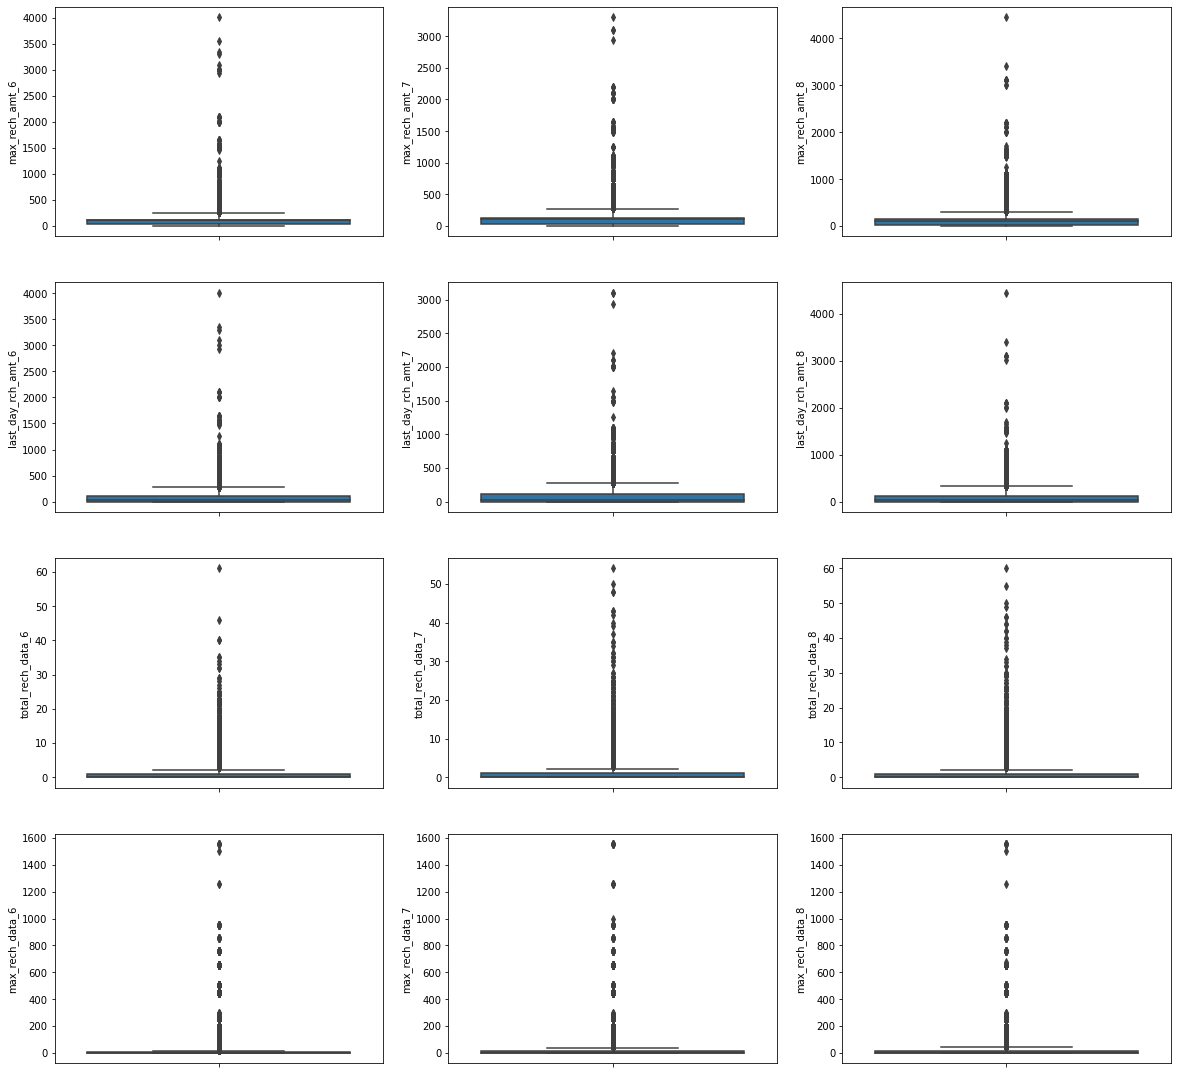

In [68]:
plt.figure(figsize=(20, 60))
i=97
while i <=108:
    plt.subplot(12,3,i-96)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

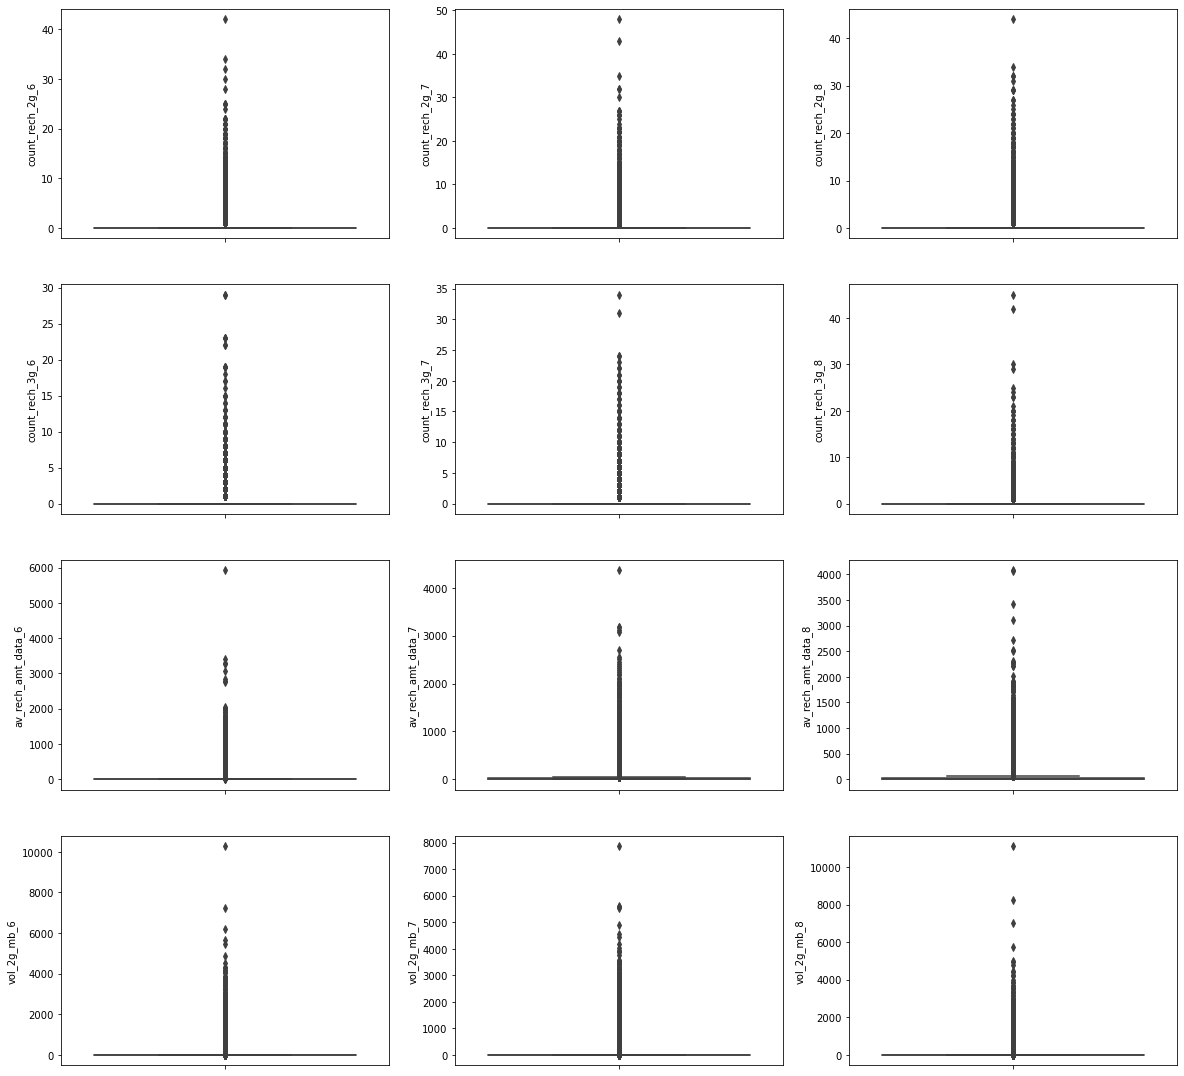

In [69]:
plt.figure(figsize=(20, 60))
i=109
while i <=120:
    plt.subplot(12,3,i-108)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

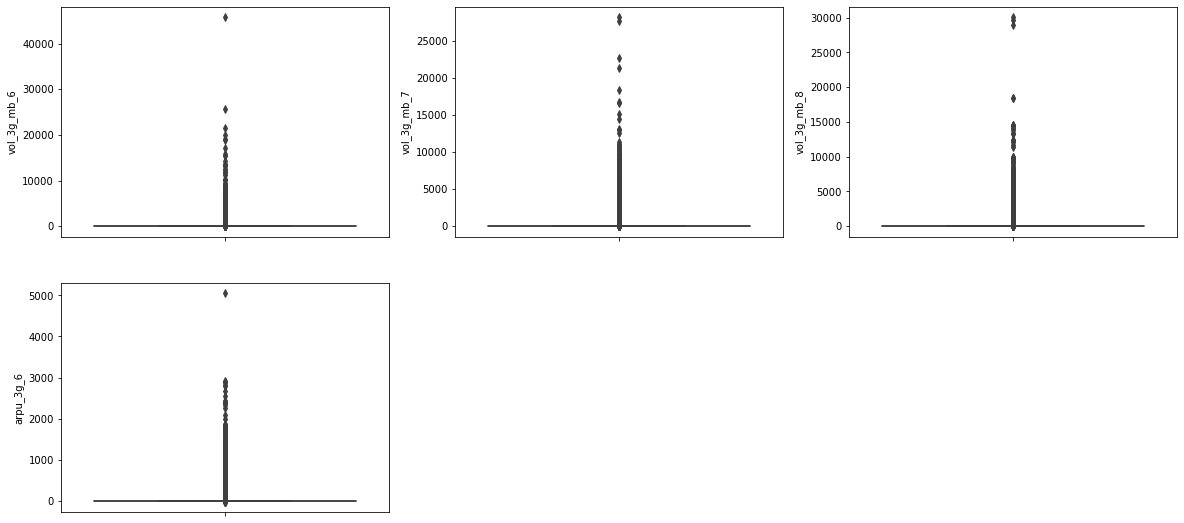

In [70]:
plt.figure(figsize=(20, 60))
i=121
while i <=124:
    plt.subplot(12,3,i-120)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()